In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

Loading the Dataset

In [2]:
df=pd.read_csv('Flights dataset.csv')

Summary of the dataset

In [ ]:
df.head()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK UNIQUE_CARRIER  AIRLINE_ID CARRIER  \
0  2009     12             2            3             9E       20363      9E   
1  2009     12             3            4             9E       20363      9E   
2  2009     12             4            5             9E       20363      9E   
3  2009     12             6            7             9E       20363      9E   
4  2009     12             7            1             9E       20363      9E   

  TAIL_NUM  FL_NUM ORIGIN  ... CANCELLED CANCELLATION_CODE DIVERTED  AIR_TIME  \
0   91879E   850.0    ATL  ...       0.0               NaN      0.0      61.0   
1   92289E   850.0    ATL  ...       0.0               NaN      0.0      49.0   
2   91629E   850.0    ATL  ...       0.0               NaN      0.0      53.0   
3   91709E   850.0    ATL  ...       0.0               NaN      0.0      51.0   
4   92289E   850.0    ATL  ...       0.0               NaN      0.0      57.0   

  DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY  SECURITY_DELAY  \
0    356.0           NaN           NaN       NaN             NaN   
1    356.0           NaN           NaN       NaN             NaN   
2    356.0           NaN           NaN       NaN             NaN   
3    356.0           NaN           NaN       NaN             NaN   
4    356.0           NaN           NaN       NaN             NaN   

   LATE_AIRCRAFT_DELAY  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 35 columns]

In [ ]:
df.shape

(182533, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182533 entries, 0 to 182532
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 182533 non-null  int64  
 1   MONTH                182533 non-null  int64  
 2   DAY_OF_MONTH         182533 non-null  int64  
 3   DAY_OF_WEEK          182533 non-null  int64  
 4   UNIQUE_CARRIER       182533 non-null  object 
 5   AIRLINE_ID           182533 non-null  int64  
 6   CARRIER              182533 non-null  object 
 7   TAIL_NUM             181618 non-null  object 
 8   FL_NUM               182532 non-null  float64
 9   ORIGIN               182532 non-null  object 
 10  ORIGIN_CITY_NAME     182532 non-null  object 
 11  ORIGIN_STATE_ABR     182532 non-null  object 
 12  ORIGIN_STATE_NM      182532 non-null  object 
 13  ORIGIN_WAC           182532 non-null  float64
 14  DEST                 182532 non-null  object 
 15  DEST_CITY_NAME   

In [ ]:
df.describe()

YEAR     MONTH   DAY_OF_MONTH    DAY_OF_WEEK     AIRLINE_ID  \
count  182533.0  182533.0  182533.000000  182533.000000  182533.000000   
mean     2009.0      12.0      15.926205       3.847545   20016.251067   
std         0.0       0.0       8.956029       1.946194     290.027110   
min      2009.0      12.0       1.000000       1.000000   19704.000000   
25%      2009.0      12.0       8.000000       2.000000   19790.000000   
50%      2009.0      12.0      16.000000       4.000000   19805.000000   
75%      2009.0      12.0      24.000000       5.000000   20366.000000   
max      2009.0      12.0      31.000000       7.000000   20437.000000   

              FL_NUM     ORIGIN_WAC       DEST_WAC   CRS_DEP_TIME  \
count  182532.000000  182532.000000  182532.000000  182532.000000   
mean     1902.455175      49.966669      49.965064    1314.801421   
std      1666.628891      25.447615      25.455233     470.115543   
min         1.000000       1.000000       1.000000      10.000000   
25%       623.000000      33.000000      33.000000     920.000000   
50%      1401.000000      41.000000      41.000000    1315.000000   
75%      2350.000000      74.000000      74.000000    1710.000000   
max      5710.000000      93.000000      93.000000    2359.000000   

            DEP_TIME  ...      ARR_DELAY      CANCELLED       DIVERTED  \
count  178651.000000  ...  178029.000000  182532.000000  182532.000000   
mean     1324.761888  ...       8.348674       0.022073       0.002597   
std       482.986738  ...      40.368992       0.146921       0.050893   
min         1.000000  ...     -92.000000       0.000000       0.000000   
25%       923.000000  ...     -12.000000       0.000000       0.000000   
50%      1325.000000  ...      -2.000000       0.000000       0.000000   
75%      1721.000000  ...      14.000000       0.000000       0.000000   
max      2400.000000  ...    1278.000000       1.000000       1.000000   

            AIR_TIME       DISTANCE  CARRIER_DELAY  WEATHER_DELAY  \
count  178029.000000  182532.000000   44252.000000   44252.000000   
mean      123.472137     884.059316      15.641146       3.392457   
std        75.838563     622.614201      40.798677      21.928311   
min         8.000000      31.000000       0.000000       0.000000   
25%        65.000000     403.000000       0.000000       0.000000   
50%       108.000000     746.500000       0.000000       0.000000   
75%       159.000000    1180.000000      16.000000       0.000000   
max       699.000000    4962.000000    1278.000000    1001.000000   

          NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
count  44252.000000    44252.000000         44252.000000  
mean      17.489469        0.112921            18.817093  
std       27.000977        2.355123            36.915899  
min        0.000000        0.000000             0.000000  
25%        0.000000        0.000000             0.000000  
50%        9.000000        0.000000             0.000000  
75%       23.000000        0.000000            24.000000  
max      479.000000      292.000000          1044.000000  

[8 rows x 23 columns]

In [ ]:
df.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
CARRIER                     0
TAIL_NUM                  915
FL_NUM                      1
ORIGIN                      1
ORIGIN_CITY_NAME            1
ORIGIN_STATE_ABR            1
ORIGIN_STATE_NM             1
ORIGIN_WAC                  1
DEST                        1
DEST_CITY_NAME              1
DEST_STATE_ABR              1
DEST_STATE_NM               1
DEST_WAC                    1
CRS_DEP_TIME                1
DEP_TIME                 3882
DEP_DELAY                3882
CRS_ARR_TIME                1
ARR_TIME                 4134
ARR_DELAY                4504
CANCELLED                   1
CANCELLATION_CODE      178504
DIVERTED                    1
AIR_TIME                 4504
DISTANCE                    1
CARRIER_DELAY          138281
WEATHER_DELAY          138281
NAS_DELAY              138281
SECURITY_D

List of Features & Their Unique Values

In [ ]:
df.nunique()

YEAR                      1
MONTH                     1
DAY_OF_MONTH             31
DAY_OF_WEEK               7
UNIQUE_CARRIER            9
AIRLINE_ID                9
CARRIER                   9
TAIL_NUM               2106
FL_NUM                 3357
ORIGIN                  213
ORIGIN_CITY_NAME        209
ORIGIN_STATE_ABR         52
ORIGIN_STATE_NM          52
ORIGIN_WAC               52
DEST                    213
DEST_CITY_NAME          209
DEST_STATE_ABR           52
DEST_STATE_NM            52
DEST_WAC                 52
CRS_DEP_TIME            945
DEP_TIME               1376
DEP_DELAY               517
CRS_ARR_TIME           1188
ARR_TIME               1424
ARR_DELAY               568
CANCELLED                 2
CANCELLATION_CODE         3
DIVERTED                  2
AIR_TIME                537
DISTANCE                723
CARRIER_DELAY           396
WEATHER_DELAY           257
NAS_DELAY               274
SECURITY_DELAY           54
LATE_AIRCRAFT_DELAY     329
dtype: int64

In [ ]:
#drop the last 6 variable since they are really sparse 

In [3]:
df1=df.drop(['CANCELLATION_CODE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'],axis=1)


fill missing value by mean

In [4]:
for i in df1.columns:
  if df1[i].dtypes=='float':
    df1[i]=df1[i].fillna(df1[i].mean())

In [ ]:
df1.select_dtypes(include='float').isnull().sum()

FL_NUM          0
ORIGIN_WAC      0
DEST_WAC        0
CRS_DEP_TIME    0
DEP_TIME        0
DEP_DELAY       0
CRS_ARR_TIME    0
ARR_TIME        0
ARR_DELAY       0
CANCELLED       0
DIVERTED        0
AIR_TIME        0
DISTANCE        0
dtype: int64

In [ ]:
df1.shape

(182533, 29)

normalize with MinMaxScaler

In [5]:
sub_df=df1.select_dtypes(include=['float','int'])
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
scaled_df = ss.fit_transform(sub_df)
scaled_df = pd.DataFrame(scaled_df, columns=sub_df.columns)
scaled_df = pd.concat([scaled_df, df1['CARRIER']], axis=1)
scaled_df.head()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  AIRLINE_ID    FL_NUM  ORIGIN_WAC  \
0   0.0    0.0      0.033333     0.333333    0.899045  0.148713    0.358696   
1   0.0    0.0      0.066667     0.500000    0.899045  0.148713    0.358696   
2   0.0    0.0      0.100000     0.666667    0.899045  0.148713    0.358696   
3   0.0    0.0      0.166667     1.000000    0.899045  0.148713    0.358696   
4   0.0    0.0      0.200000     0.000000    0.899045  0.148713    0.358696   

   DEST_WAC  CRS_DEP_TIME  DEP_TIME  DEP_DELAY  CRS_ARR_TIME  ARR_TIME  \
0  0.380435      0.742869  0.751146   0.050075      0.817642  0.809504   
1  0.380435      0.742869  0.729887   0.041854      0.817642  0.801584   
2  0.380435      0.742869  0.730721   0.043348      0.817642  0.799917   
3  0.380435      0.742869  0.729054   0.040359      0.817642  0.798666   
4  0.380435      0.742869  0.729887   0.041854      0.817642  0.804085   

   ARR_DELAY  CANCELLED  DIVERTED  AIR_TIME  DISTANCE CARRIER  
0   0.077372        0.0       0.0  0.076700   0.06591      9E  
1   0.063504        0.0       0.0  0.059334   0.06591      9E  
2   0.060584        0.0       0.0  0.065123   0.06591      9E  
3   0.058394        0.0       0.0  0.062229   0.06591      9E  
4   0.067883        0.0       0.0  0.070912   0.06591      9E

**qestion1: which airline dose the most cancellation? comparing total cancellation between US airlines**

**interactive 2D bar plot**

In [6]:
Cancelled1=scaled_df.groupby('CARRIER').agg({'CANCELLED':np.sum}).sort_values(by='CANCELLED')
Airlines=list(scaled_df['CARRIER'].value_counts().index)
Cancelled1=list(Cancelled1['CANCELLED'])
fig = px.bar(x=Airlines, y=Cancelled1, 
                  labels=dict(x="Airlines", y="total cancellation"), title='Total Cancellation For Each US Airline In 2009')
fig.show()





**qestion2: which airline dose the most departure delay?comparing Average departure delay time between US airlines**

**interactive 2D bar plot**

In [7]:
DELAY=df1.groupby('CARRIER').agg({'DEP_DELAY':np.mean}).sort_values(by='DEP_DELAY')
Airlines=list(df1['CARRIER'].value_counts().index)
DELAY1=list(DELAY['DEP_DELAY'])

fig = px.bar(x=Airlines, y=DELAY1, 
                  labels=dict(x="Airlines", y="Average Departure Delay"), title='Average Departure Delay Time Between 9 US Airlines In 2009')
fig.show()

**qestion3: Are there any relationship between Departure Delay and Arrive Delay in different airline?**

Text(0.5, 1.05, 'relationship between departure delay and arrive delay in different airline ')

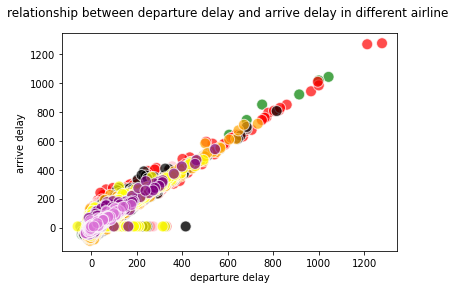

In [8]:
colors = ['red' if i=='AA' else 'yellow' if i =='EV' else 'green' 
          if i == '9E' else 'black' if i=='CO' else 'pink' if 
          i=='B6' else 'grey' if i=='AS'  else 'purple' 
          if i=='F9' else 'orange' if i=='DL' else 'orchid' for i in list(df1['CARRIER'])]
  
plt.scatter(df1['DEP_DELAY'], df1['ARR_DELAY'], c=colors,s=120,
            alpha=0.7, edgecolors='w')

plt.xlabel('departure delay')
plt.ylabel('arrive delay')
plt.title('relationship between departure delay and arrive delay in different airline ',y=1.05)


**question4:compare destinations travelled of US airlines in 2009.**

**interactive 3D scatter plot**

In [ ]:
scat = df1['DEST_STATE_NM'].value_counts()

fig = px.scatter(scat, x=scat.index, y=scat, color=scat,
                 size=scat, labels=dict(x="Destinations", y="Number of Flights"), title='Most Travelled Destinations In US (2009)')
fig.show()

**answer: the above plote investigate the top most travelled destinations of US airlines in 2009. As can be seen Gergia and Texas were by far the top 2 most travelled destinations in 2009**

**question5:compare weekly average delay in Departure and Arrival in 2009.**

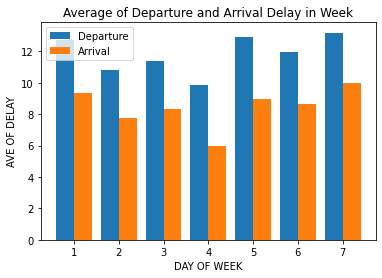

In [ ]:

  # Design a chart for weekly average delay in Departure and Arrival.

  
X_axis = np.arange(1,8)

DEP_DELAY = df1.groupby(['DAY_OF_WEEK'])['DEP_DELAY'].mean()
ARR_DELAY = df1.groupby(['DAY_OF_WEEK'])['ARR_DELAY'].mean()

plt.bar(X_axis - 0.2, DEP_DELAY, 0.4, label = 'Departure')
plt.bar(X_axis + 0.2, ARR_DELAY, 0.4, label = 'Arrival')
  
plt.xticks(X_axis, X_axis )
plt.xlabel("DAY OF WEEK")
plt.ylabel("AVE OF DELAY")
plt.title("Average of Departure and Arrival Delay in Week")
plt.legend()
plt.show()


**question6:which Day Of Week And wich Airline have the high Delay?**

**interactive 3D bar plot**

In [ ]:
#interactive 3D bar plot
WEEK = list(np.arange(1,8))

DELAY = df1.groupby(['DAY_OF_WEEK','CARRIER']).agg({'DEP_DELAY':np.mean})
DELAY=DELAY.reset_index()

fig = px.bar(DELAY,x='DAY_OF_WEEK', y='DEP_DELAY' ,color='CARRIER', labels=dict(x="DAY OF WEEK", y="Number of Flights"), title="Average Delay In Each Day Of The Week And Each Airline")
fig.show()

**question7:investigat relationship between departure delay, arrive delay, air time and destination?**

**interactive 4D scatter plot**

In [10]:
# interactive 4D scatter plot
data = px.scatter_3d(df1, x='DEP_DELAY', y='AIR_TIME', z='ARR_DELAY', color='DISTANCE')

layout1 = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout1)
#py.plot(fig)
fig.show()